<a href="https://colab.research.google.com/github/sofiane1010/SIC_test/blob/main/nlp_test/problem_0701.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quiz #0701

In [ ]:
pip install scikit-learn==0.23

     |████████████████████████████████| 7.3 MB 4.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


### "TensorFlow machine learning with Calilfornia housing data"

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()
%matplotlib inline
warnings.filterwarnings('ignore')    # Turn the warnings off.

Instructions for updating:
non-resource variables are not supported in the long term


#### Answer the following question by providing Python code:

In [ ]:
# Bring the data.
housing_data = fetch_california_housing(as_frame=True)

In [ ]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [ ]:
df = housing_data["data"]
df[housing_data["target_names"][0]] = housing_data["target"]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

## Data preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


all features are numerical, and we have no missing data.

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


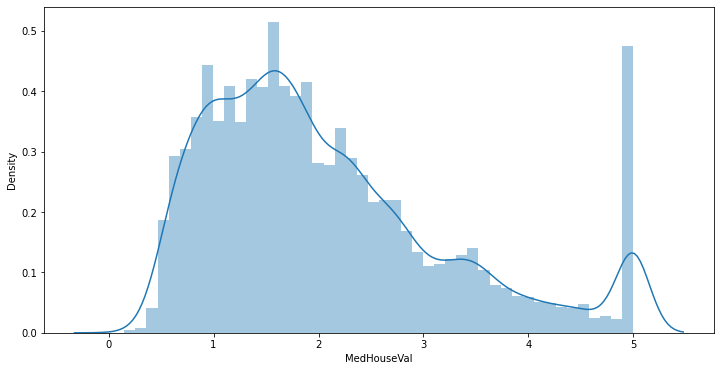

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df["MedHouseVal"])

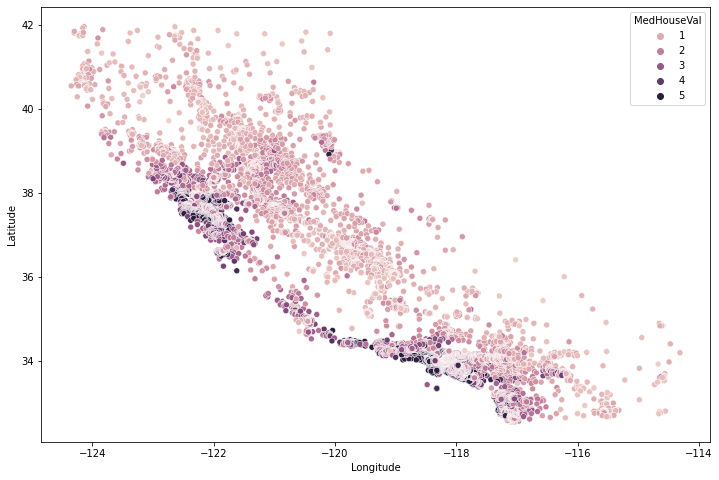

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df["Longitude"],y=df["Latitude"],hue=df["MedHouseVal"])

looking for linear and non-linear correlations :

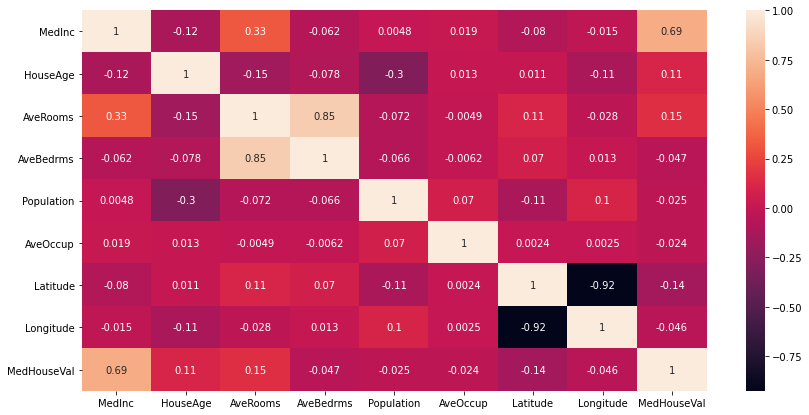

In [ ]:
pearson_corr = df.corr("pearson")

plt.figure(figsize=(14,7))
sns.heatmap(pearson_corr, annot=True)

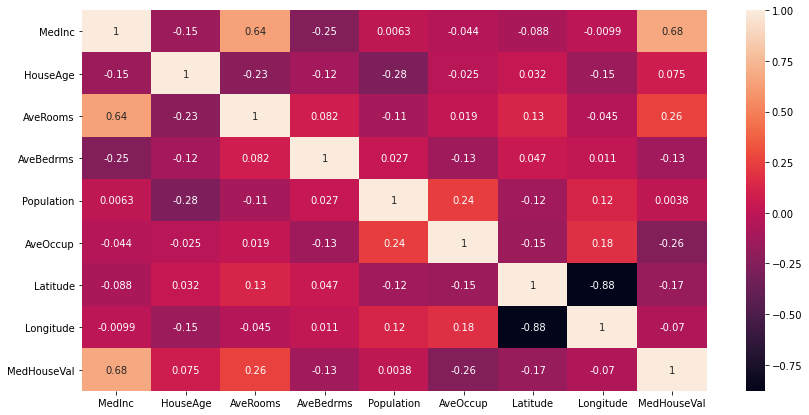

In [ ]:
spearman_corr = df.corr("spearman")

plt.figure(figsize=(14,7))
sns.heatmap(spearman_corr, annot=True)

we keep these features : MedInc, HouseAge, AveRooms, AveOccup 

In [ ]:
df = df[["MedInc", "HouseAge", "AveRooms", "MedHouseVal", "Longitude", "Latitude"]]

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,MedHouseVal,Longitude,Latitude
0,8.3252,41.0,6.984127,4.526,-122.23,37.88
1,8.3014,21.0,6.238137,3.585,-122.22,37.86
2,7.2574,52.0,8.288136,3.521,-122.24,37.85
3,5.6431,52.0,5.817352,3.413,-122.25,37.85
4,3.8462,52.0,6.281853,3.422,-122.25,37.85


## Model

splitting data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(scale(df.drop("MedHouseVal", axis=1)), df["MedHouseVal"], test_size=0.3, shuffle=True)

In [ ]:
w = tf.Variable(tf.zeros((X_train.shape[1],1)))             # A constant initial value.
b = tf.Variable(1.0)                # A constant initial value.

In [ ]:
X_ph = tf.placeholder(tf.float32, shape=X_train.shape)
y_ph= tf.placeholder(tf.float32, shape=Y_train.shape)

In [ ]:
y_model= tf.matmul(X_ph, w) + b

In [ ]:
loss = tf.reduce_mean(tf.square(y_ph - y_model))

In [ ]:
optimizer = tf.train.MomentumOptimizer(learning_rate = 0.001, momentum=0.9)

In [ ]:
n_epochs = 400                                      # N# of epochs (gradient descent steps).
train = optimizer.minimize(loss)                     # Define training. Use optimizer.minimize(loss)
init = tf.global_variables_initializer()                                          # Define Variable initialization.
                                                      #Returns an Op that initializes global variablestf.global_variables_initializer().



with tf.Session() as sess:
        # Variables initialization.
        sess.run(init)
        
        # Training.
        my_feed = {X_ph:X_train, y_ph:Y_train}        #************** write your code here****************####                # Prepare feed data as a dictionary. 
        
        for i in range(n_epochs):
                 
            sess.run(train, feed_dict = my_feed)
        w_model, b_model = sess.run([w, b])                   # Get the final values of the Variables.
        # Testing.
        
        mse_value = sess.run(loss, feed_dict = my_feed)            # Calculate the in-sample MSE.
        
        
        
 

In [ ]:
print(w_model)
print(b_model)

[[-4.6937901e-05]
 [-3.4694916e-05]
 [ 3.7735361e-05]
 [-3.5967215e-04]
 [-3.6179661e-04]]
2.070751


In [ ]:
print("MSE  = {:5.3f}".format(mse_value))
print("RMSE = {:5.3f}".format(np.sqrt(mse_value)))

MSE  = 1.327
RMSE = 1.152
